In [1]:
%pip install hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 848.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.5/132.5 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 

In [2]:
import cv2
import hub
# import deeplake
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# bikes = hub.Dataset("google/bikes")
# # ds = deeplake.load('hub://activeloop/objectron_bottle_test')
# frame_id = 0
# element=bikes[frame_id].compute()
# # image_arr = ds.image[0].numpy()
bikes = hub.dataset("hub://activeloop/objectron_bike_train")
image=bikes['image'][129].numpy()

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/objectron_bike_train

hub://activeloop/objectron_bike_train loaded successfully.



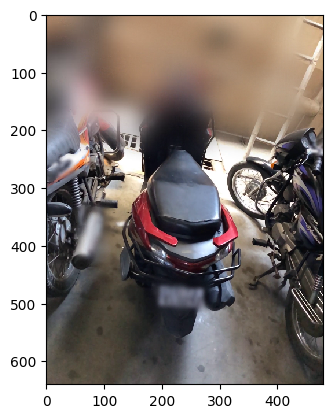

In [5]:
plt.imshow(image, interpolation='nearest')

In [6]:
def get_bbox(example):
  # Initialize variables 
  RADIUS = 10
  COLOR = (255, 255, 255)
  EDGES = [[1, 5], [2, 6], [3, 7], [4, 8],  # lines along x-axis
    [1, 3], [5, 7], [2, 4], [6, 8],  # lines along y-axis
    [1, 2], [3, 4], [5, 6], [7, 8]]   # lines along z-axis

  arranged_points = example['point_2d'].numpy().reshape(9,3)

  # Initialize this variable so that we can add all dots on the image around the box
  image_with_box = example['image'].numpy()

  for i in range(arranged_points.shape[0]):
      x, y, _ = arranged_points[i]
      # Adding the dots on the image around the box
      image_with_box = cv2.circle(image_with_box,(int(x * example['image_width'].numpy()[0]), int(y * example['image_height'].numpy()[0])), RADIUS, COLOR, -10)

  # Now adding the connecting lines between the dots of the box, thus creating the 3D box
  for edge in EDGES:
    start_points = arranged_points[edge[0]]
    start_x = int(example['image_width'].numpy() * start_points[0])
    start_y = int(example['image_height'].numpy() * start_points[1])
    end_points = arranged_points[edge[1]]
    end_x = int(example['image_width'].numpy() * end_points[0])
    end_y = int(example['image_height'].numpy() * end_points[1])
    image_with_box = cv2.line(image_with_box, (start_x, start_y), (end_x, end_y), COLOR, 2)

  plt.imshow(image_with_box)


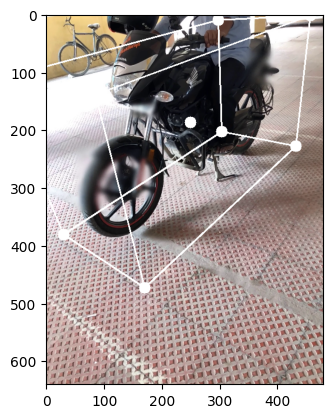

In [16]:
get_bbox(bikes[1600])


In [8]:
cups = hub.load("hub://activeloop/objectron_cup_train")

cups['image'].shape


This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/objectron_cup_train

hub://activeloop/objectron_cup_train loaded successfully.



(436513, 640, 480, 3)

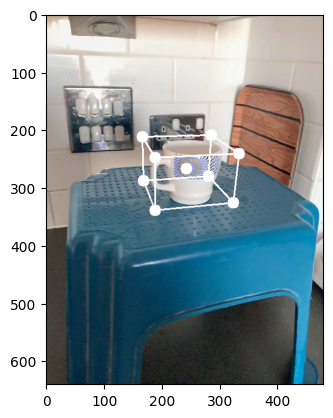

In [12]:
get_bbox(cups[340])
